In [53]:
%run lib.py

---

In [56]:
sim = joblib.load('data/sim_lapin.pickle')

In [75]:
clu, intens, contr = FADDIS(100).predict(sim)

INFO:FADDIS:i = 0, xi = 0.8748, sqrt(xi) = 0.9353
INFO:FADDIS:E = 349.2449
INFO:FADDIS:i = 1, xi = 0.9004, sqrt(xi) = 0.9489
INFO:FADDIS:E = 348.4342
INFO:FADDIS:i = 2, xi = 0.8246, sqrt(xi) = 0.9080
INFO:FADDIS:E = 347.7543
INFO:FADDIS:i = 3, xi = 0.5840, sqrt(xi) = 0.7642
INFO:FADDIS:E = 347.4133
INFO:FADDIS:i = 4, xi = 0.7237, sqrt(xi) = 0.8507
INFO:FADDIS:E = 346.8896
INFO:FADDIS:i = 5, xi = 0.6648, sqrt(xi) = 0.8154
INFO:FADDIS:E = 346.4476
INFO:FADDIS:i = 6, xi = 0.6198, sqrt(xi) = 0.7873
INFO:FADDIS:E = 346.0635
INFO:FADDIS:i = 7, xi = 0.5958, sqrt(xi) = 0.7719
INFO:FADDIS:E = 345.7084
INFO:FADDIS:i = 8, xi = 0.4945, sqrt(xi) = 0.7032
INFO:FADDIS:E = 345.4639
INFO:FADDIS:i = 9, xi = 0.4423, sqrt(xi) = 0.6650
INFO:FADDIS:E = 345.2683
INFO:FADDIS:i = 10, xi = 0.6696, sqrt(xi) = 0.8183
INFO:FADDIS:E = 344.8199
INFO:FADDIS:i = 11, xi = 0.2738, sqrt(xi) = 0.5233
INFO:FADDIS:E = 344.7450
INFO:FADDIS:i = 12, xi = 0.5195, sqrt(xi) = 0.7208
INFO:FADDIS:E = 344.4750
INFO:FADDIS:i = 13, xi

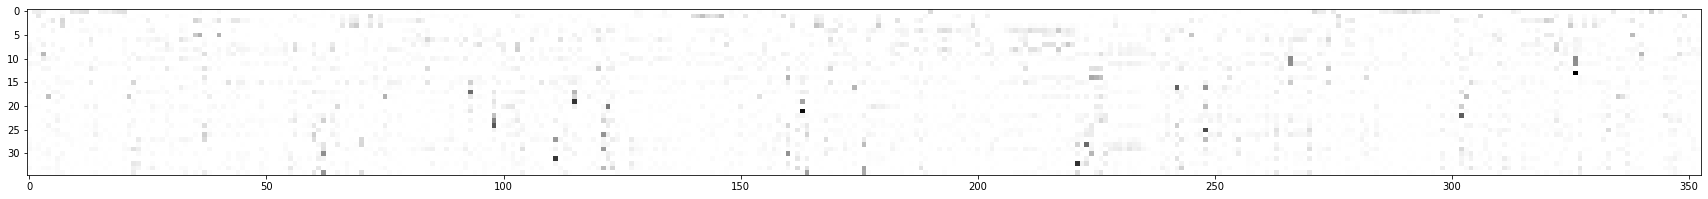

In [76]:
plt.figure(figsize=(30, 22))
plt.imshow(clu, cmap='Greys');

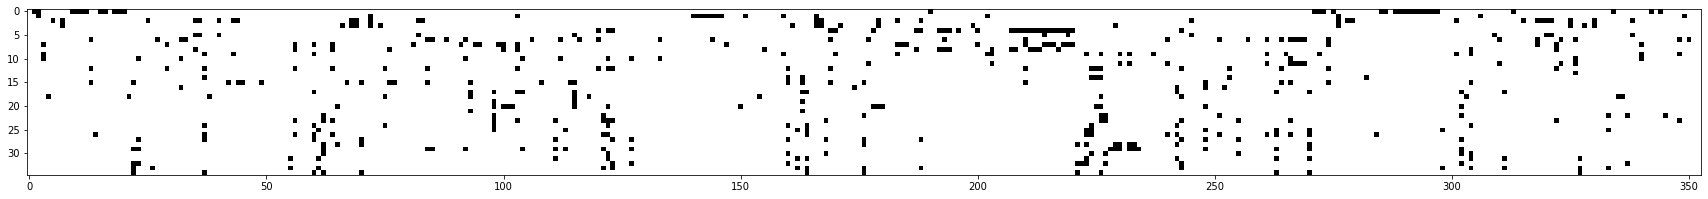

In [77]:
plt.figure(figsize=(30, 22))
plt.imshow((clu > 0.1).astype(int), cmap='Greys');

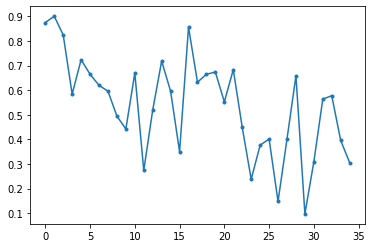

In [78]:
plt.plot(intens, '.-');

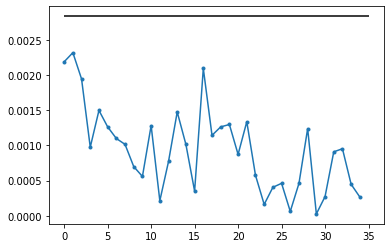

In [79]:
plt.plot(contr.squeeze(), '.-');
plt.hlines(1/len(sim), 0, len(clu));

In [80]:
(np.diag(sim)**2).sum()

349.01880242025874

---

Output to spreadsheet

In [81]:
score_df = pd.read_csv('data/text_to_topic_scores.csv', index_col=0)

In [82]:
topics = score_df.columns.values

In [83]:
clu.shape, intens.shape, contr.shape

((35, 353), (35,), (1, 35))

In [84]:
clusters_df = pd.DataFrame(clu, columns=topics)
intens_s = pd.Series(intens, name='xi')
contr_s = pd.Series(contr.squeeze(), name='contribution')

In [85]:
cluster_summary_df = (
    pd.concat((intens_s, contr_s), axis=1)
    .reset_index()
    .rename(columns={'index': 'cluster_id'})
)
cluster_summary_df.to_excel('data/cluster_contributions.xlsx', index=False)

In [86]:

cluster_topics_df = (clusters_df
     .stack()
     .reset_index()
     .rename(columns={'level_0': 'cluster_id',
                     'level_1': 'label',
                     0: 'u'})
     .sort_values(['cluster_id', 'u'], ascending=[True, False])
     .loc[lambda x: x['u'] > 0]
     .set_index(['cluster_id', 'label'])
)
cluster_topics_df.to_excel(f'data/cluster_topics_u_nonzero.xlsx', index=True)

---